In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option("display.notebook_repr_html", False)
#pd.set_option("display.max_rows",100)
#pd.set_option("expand_frame_repr", True)
#pd.set_option('max_colwidth',80)

tips = pd.read_csv("http://gagolewski.com/resources/data/tips.csv", comment="#")
iris = pd.read_csv("http://gagolewski.com/resources/data/iris.csv", comment="#")
flights = pd.read_csv("http://gagolewski.com/resources/data/flights.csv", comment="#")
plt.xkcd()
weather = pd.read_csv(
  "http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz",  
  compression="gzip",
  comment="#"
)

# THIS WORKS: Convert seperate columns into one DateTime

In [22]:
#weather.head()
#weather["Index"]=weather.index
#weather.head()
#weather.info()
#weather.
new_index = pd.to_datetime(weather.loc[:,['year','month','day','hour']])
new_index.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 06:00:00',
               '2013-01-01 07:00:00', '2013-01-01 08:00:00',
               '2013-01-01 09:00:00', '2013-01-01 10:00:00',
               ...
               '2013-12-30 14:00:00', '2013-12-30 15:00:00',
               '2013-12-30 16:00:00', '2013-12-30 17:00:00',
               '2013-12-30 18:00:00', '2013-12-30 19:00:00',
               '2013-12-30 20:00:00', '2013-12-30 21:00:00',
               '2013-12-30 22:00:00', '2013-12-30 23:00:00'],
              dtype='datetime64[ns]', length=26130, freq=None)

In [23]:
%%script False
weather['year'] = weather['year'].astype(int)
weather['month'] = weather['month'].astype(int)
weather['day'] = weather['day'].astype(int)
weather['hour'] = weather['hour'].astype(int)

Couldn't find program: 'False'


In [24]:
%%script false
df = pd.DataFrame(weather[['year','month','day','hour']])
df.head()
dt_series = pd.to_datetime(df)
#dt_series.head()
weather.index = dt_series
#weather['time_hour2'] = dt_series
weather.head(10)
#dt_series.name
#df.info()

Couldn't find program: 'false'


In [25]:
%%script False
new_col = weather["day"].map(str) + " " + weather["month"].map(str) + " " + weather["year"].map(str) + " "
new_col.head()
weather['dt'] = pd.to_datetime(new_col)
weather.head()

Couldn't find program: 'False'


## Find a NAN

In [26]:
%%script False
filter1 = weather["origin"] == 'JFK'
JFK = weather[filter1]
#JFK.describe()
#JFK['temp'].plot()
JFK.head(10)

Couldn't find program: 'False'


## select JFK

In [43]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
2013-01-01 00:00:00,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
2013-01-01 01:00:00,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2013-01-01 02:00:00,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
2013-01-01 03:00:00,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
2013-01-01 04:00:00,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
2013-01-01 00:00:00,JFK,2013,1,1,0,37.94,23.00,54.51,240.0,16.11092,18.540125,0.0,1014.4,10.0,2013-01-01 01:00:00
2013-01-01 01:00:00,JFK,2013,1,1,1,37.94,24.08,57.04,250.0,17.26170,19.864419,0.0,1013.5,10.0,2013-01-01 02:00:00
2013-01-01 02:00:00,JFK,2013,1,1,2,39.02,24.98,56.77,240.0,19.56326,22.513008,0.0,1013.0,10.0,2013-01-01 03:00:00
2013-01-01 03:00:00,JFK,2013,1,1,3,39.02,26.06,59.37,240.0,18.41248,21.188714,0.0,1013.2,10.0,2013-01-01 04:00:00
2013-01-01 04:00:00,JFK,2013,1,1,4,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0,2013-01-01 05:00:00
2013-01-01 06:00:00,JFK,2013,1,1,6,39.02,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 07:00:00
2013-01-01 07:00:00,JFK,2013,1,1,7,39.02,26.06,59.37,270.0,11.50780,13.242946,0.0,1012.4,10.0,2013-01-01 08:00:00
2013-01-01 08:00:00,JFK,2013,1,1,8,39.92,26.96,59.50,260.0,14.96014,17.215830,0.0,1012.7,10.0,2013-01-01 09:00:00
2013-01-01 09:00:00,JFK,2013,1,1,9,39.92,28.04,62.21,250.0,17.26170,19.864419,0.0,1012.6,10.0,2013-01-01 10:00:00
2013-01-01 10:00:00,JFK,2013,1,1,10,39.02,26.96,61.63,260.0,14.96014,17.215830,0.0,1012.1,10.0,2013-01-01 11:00:00


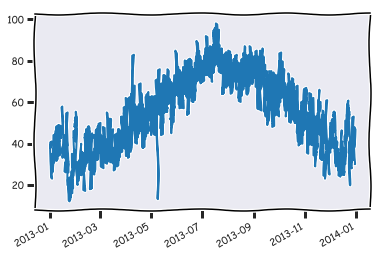

In [50]:
filter1 = weather.loc[:,"origin"] == 'JFK'
JFK = weather[filter1].copy()
JFK['temp'].plot()
JFK.head(10)

# New indexing over entire year

In [51]:
# New index
new_ind = pd.date_range("2013-01-01 00","2013-12-31 23", freq="1H")
print(len(new_ind))

8760


In [65]:
JFK = JFK.reindex(new_ind)
JFK.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
2013-01-01 00:00:00,JFK,2013.0,1.0,1.0,0.0,37.94,23.00,54.51,240.0,16.11092,18.540125,0.0,1014.4,10.0,2013-01-01 01:00:00
2013-01-01 01:00:00,JFK,2013.0,1.0,1.0,1.0,37.94,24.08,57.04,250.0,17.26170,19.864419,0.0,1013.5,10.0,2013-01-01 02:00:00
2013-01-01 02:00:00,JFK,2013.0,1.0,1.0,2.0,39.02,24.98,56.77,240.0,19.56326,22.513008,0.0,1013.0,10.0,2013-01-01 03:00:00
2013-01-01 03:00:00,JFK,2013.0,1.0,1.0,3.0,39.02,26.06,59.37,240.0,18.41248,21.188714,0.0,1013.2,10.0,2013-01-01 04:00:00
2013-01-01 04:00:00,JFK,2013.0,1.0,1.0,4.0,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0,2013-01-01 05:00:00
2013-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2013-01-01 06:00:00,JFK,2013.0,1.0,1.0,6.0,39.02,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 07:00:00
2013-01-01 07:00:00,JFK,2013.0,1.0,1.0,7.0,39.02,26.06,59.37,270.0,11.50780,13.242946,0.0,1012.4,10.0,2013-01-01 08:00:00
2013-01-01 08:00:00,JFK,2013.0,1.0,1.0,8.0,39.92,26.96,59.50,260.0,14.96014,17.215830,0.0,1012.7,10.0,2013-01-01 09:00:00
2013-01-01 09:00:00,JFK,2013.0,1.0,1.0,9.0,39.92,28.04,62.21,250.0,17.26170,19.864419,0.0,1012.6,10.0,2013-01-01 10:00:00


In [70]:
#JFK["time_hour"] = new_time
#JFK.head(10)
#JFK['time_hour'].isnan()
print("Total missing rows:", JFK['temp'].isnull().sum())

Total missing rows: 49


In [71]:
%%script false
start_t, stop_t = JFK['time_hour'].iloc[0], JFK['time_hour'].iloc[-1]
print(start_t, stop_t)
new_index = pd.date_range(start_t,stop_t, freq="60min")
print(len(new_index))
print(type(new_index))
new_index_df = pd.DataFrame()
new_index

Couldn't find program: 'false'


In [72]:
%%script false
weather2 = new_index_df.merge(weather,how='outer')
weather2.head()

Couldn't find program: 'false'


## Convert to C

In [73]:
def f_c(f):
    return (f -32)* 5/9  
JFK2.loc[:,"temp"] = JFK.loc[:,"temp"].apply(f_c)

# Fill NAN

In [101]:
JFK2['temp'] = JFK2['temp'].fillna(method='ffill');

## Grouping by day, aggregate mean

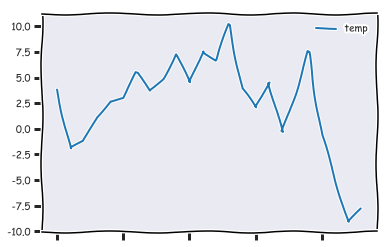

In [107]:
new = JFK2['temp'].groupby([JFK2.index.year, JFK2.index.month, JFK2.index.day]).mean()
new.head()
#type(new)
#JFK2.groupby([df.index.year, df.index.month, df.index.day]).transform(np.cumsum).resample('B', how='ohlc')
#pd.DataFrame(new.head(24))
pd.DataFrame(new.head(24)).plot()

## 5 largest days

In [109]:
JFK2['temp'].nlargest()

2013-07-18 16:00:00    36.7
2013-07-18 15:00:00    36.1
2013-07-18 18:00:00    36.1
2013-07-16 18:00:00    35.6
2013-07-18 14:00:00    35.6
Name: temp, dtype: float64

## Remove NAN

In [20]:
#weather2.info()
print("Nans",weather2['temp'].isnull().sum())
weather2['temp'] = weather2['temp'].fillna(method='ffill')
print("Nans",weather2['temp'].isnull().sum())
#df = pd.DataFrame(weather2['temp'].isnull())
#df.plot()
#newdf = df['temp'].astype(int)
#newdf.plot()
#newdf.iloc[8000:12000]
#newdf2 = newdf.iloc[000:-1]
#len(newdf2)
#newdf2.plot()
#weather2['']

Nans 151
Nans 0


In [22]:
#weather2.index = my_datetime
weather2.head()
#weather2.describe()

,Index,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,time_hour2
0,0,EWR,2013.0,1.0,1.0,0.0,2.8,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00,2013-01-01 00:00:00
1,1,EWR,2013.0,1.0,1.0,1.0,2.8,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00,2013-01-01 01:00:00
2,2,EWR,2013.0,1.0,1.0,2.0,3.3,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00,2013-01-01 02:00:00
3,3,EWR,2013.0,1.0,1.0,3.0,3.3,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00,2013-01-01 03:00:00
4,4,EWR,2013.0,1.0,1.0,4.0,3.3,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00,2013-01-01 04:00:00


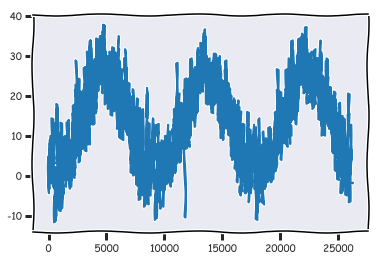

In [23]:
weather2.loc[:,"temp"].plot()

## Select JFK

,Index,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,time_hour2
8708,8708,JFK,2013.0,1.0,1.0,0.0,3.3,23.00,54.51,240.0,16.11092,18.540125,0.0,1014.4,10.0,2013-01-01 01:00:00,2013-01-01 00:00:00
8709,8709,JFK,2013.0,1.0,1.0,1.0,3.3,24.08,57.04,250.0,17.26170,19.864419,0.0,1013.5,10.0,2013-01-01 02:00:00,2013-01-01 01:00:00
8710,8710,JFK,2013.0,1.0,1.0,2.0,3.9,24.98,56.77,240.0,19.56326,22.513008,0.0,1013.0,10.0,2013-01-01 03:00:00,2013-01-01 02:00:00
8711,8711,JFK,2013.0,1.0,1.0,3.0,3.9,26.06,59.37,240.0,18.41248,21.188714,0.0,1013.2,10.0,2013-01-01 04:00:00,2013-01-01 03:00:00
8712,8712,JFK,2013.0,1.0,1.0,4.0,3.9,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0,2013-01-01 05:00:00,2013-01-01 04:00:00
8713,8713,JFK,2013.0,1.0,1.0,6.0,3.9,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 07:00:00,2013-01-01 06:00:00
8714,8714,JFK,2013.0,1.0,1.0,7.0,3.9,26.06,59.37,270.0,11.50780,13.242946,0.0,1012.4,10.0,2013-01-01 08:00:00,2013-01-01 07:00:00
8715,8715,JFK,2013.0,1.0,1.0,8.0,4.4,26.96,59.50,260.0,14.96014,17.215830,0.0,1012.7,10.0,2013-01-01 09:00:00,2013-01-01 08:00:00
8716,8716,JFK,2013.0,1.0,1.0,9.0,4.4,28.04,62.21,250.0,17.26170,19.864419,0.0,1012.6,10.0,2013-01-01 10:00:00,2013-01-01 09:00:00
8717,8717,JFK,2013.0,1.0,1.0,10.0,3.9,26.96,61.63,260.0,14.96014,17.215830,0.0,1012.1,10.0,2013-01-01 11:00:00,2013-01-01 10:00:00


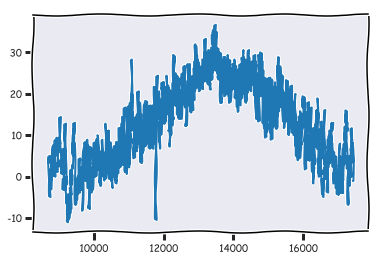

In [26]:
filter1 = weather2["origin"] == 'JFK'
JFK = weather2[filter1]
JFK.describe()
JFK['temp'].plot()
JFK.head(10)

In [58]:

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
JFK.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

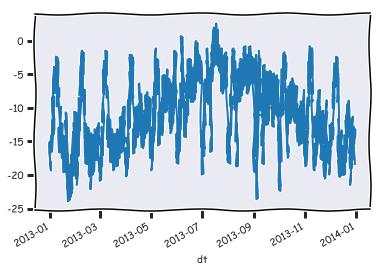

In [57]:
JFK['temp'].isnull().sum()
JFK['temp'].plot()
JFK.
#df = pd.DataFrame(weather2['temp'].isnull())
#df.plot()
#newdf = df['temp'].astype(int)

In [16]:
cnt_missing = JFK["temp"].isnull().sum()

print("Missing rows: {}".format(cnt_missing))

if sum(JFK["temp"].isnull()):
    print("MISSING DATA FILLED")
    #JFK["temp"].fillna(method='ffill')


Missing rows: 0


Missing rows: 0


In [60]:
JFKgrouped = JFK.groupby(['year','month','day']).mean()

In [61]:
JFKgrouped.head()

                     hour      temp       dewp      humid    wind_dir  \
year month day                                                          
2013 1     1    11.782609  3.817391  24.776522  56.926087  273.478261   
           2    11.500000 -1.920833   9.837500  45.210417  320.000000   
           3    11.500000 -1.237500  13.970000  51.621667  298.333333   
           4    11.500000  1.129167  19.452500  55.007917  256.250000   
           5    11.500000  2.720833  19.197500  48.918750  279.166667   

                wind_speed  wind_gust  precip     pressure  visib  
year month day                                                     
2013 1     1     15.410445  17.734032     0.0  1012.663636   10.0  
           2     15.679378  18.043514     0.0  1017.287500   10.0  
           3     11.316003  13.022230     0.0  1021.225000   10.0  
           4     15.775276  18.153872     0.0  1017.854167   10.0  
           5     13.665512  15.725998     0.0  1021.262500   10.0  

In [ ]:
new = JFKgrouped["month"] + " " + flights["year"].map(str)
#flights['date'] = pd.to_datetime(new)

In [ ]:
JFKgrouped

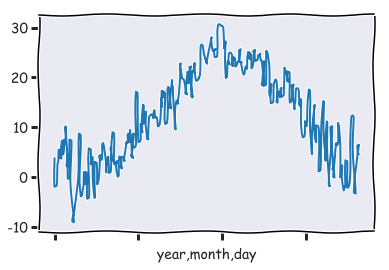

In [62]:
JFKgrouped['temp'].plot()